### Basic Image Classification Using Tensorflow

In [9]:
#we are going to create and train a nueral network model to classify handwritten digits

#importing tensorflow

!pip install tensorflow==2.2.0 --user --use-feature=2020-resolver
import tensorflow as tf



  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)


In [11]:
#importing dataset

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


#### mnist dataset has handwritten images of digits that can be used for trianing our model!

In [12]:
# Let's look at the shape of the imported arrays

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#### So based on the shapes; our training set has 60,000 image examples , and each image consists of 28 pixels height and 28 pixels in width. We are going to set aside 10,000 examples for testing our model later on! 
#### Here, I'm going to plot an example:

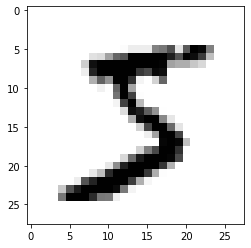

In [14]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [15]:
# Let's display the label for the image presented
y_train[0]

5

In [16]:
# Now let's check all the unique labels in our dataset

print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## One Hot Encoding

#### using encoding we will convert the labels to a list of 10 elements. For example, the digit 5 will be converted to [0,0,0,0,0,1,0,0,0,0]

In [18]:
# Using a helper function from Keras we can perform the encoding
from tensorflow.keras.utils import to_categorical
    
# Using it on both sets
y_train_encoded= to_categorical(y_train)
y_test_encoded= to_categorical(y_test)

In [19]:
# Let's validate the shapes of the encoded sets
print("shape of y_train_encoded", y_train_encoded.shape)
print("shape of y_test_encoded", y_test_encoded.shape)

shape of y_train_encoded (60000, 10)
shape of y_test_encoded (10000, 10)


In [20]:
# displaying an example
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### So now we have a 10 dimensional vector for each example, which makes it a classification problem! Our neural network has to now predict which switch (out of 10) is on!

## Neural Networks

In [26]:
# Now it's time for pre-processing our input.
# We want to unrole the input arrays to 784 dimensional vectors

#importing Numpy
import numpy as np

#unrolling
x_train_reshaped= np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

#validating the shapes
print("Shape of x_train_reshaped:", x_train_reshaped.shape)
print("Shape of x_test_reshaped:", x_test_reshaped.shape)

Shape of x_train_reshaped: (60000, 784)
Shape of x_test_reshaped: (10000, 784)


#### Now we need to normalize our data.  To do so we need to calculate the mean and the standard deviation, and also define a small constant such as an epsilon! We use the epsilon in our equation to prevent the unstability in computations if it exists!

In [28]:
#data normalization

# calculating mean and std
x_mean= np.mean(x_train_reshaped)
x_std= np.std(x_train_reshaped)

#defingin epsilon
epsilon= 1e-10

#normalized values
x_train_norm= (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm= (x_test_reshaped - x_mean) / (x_std + epsilon)

In [29]:
# let's look at an example of the normalized pixel value
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

#### Now we will create our neural network model using Keras and Tensorflow!
#### We will use a sequential model from Keras and will add 2 hidden layers (dense layers), with 128 nodes each! We also add one output layer with 10 nodes for the 10 classes!

In [30]:
# importing the sequential class and dense layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Activation Function

#### The first step in the node is the linear sum : Z=W.X +b
#### The second step in the node is the activation function: A= f(Z)
#### We use "relu" for our input layers. Relu is one of the most common activation functions used, which is basically a linear function for all the positive values, and it is zero for all the negative values!
#### We use "softmax" for the output layer. Softmax activation function gives the probability scores for each node, which sums up to 1. So it gives the probability for various classes given the input, and the class with the highest probability gives out the prediction!

In [35]:
# creating our model with 2 hidden layers and one output layer; in order

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
    ])

#### To compile the model we have to define an optimization algorithm. Here we use 'sgd'. Stochastic gradient descent (sgd) is an iterative method for optimizing an objective function with suitable smoothness properties. Basically the optimization function minimizes the loss function:

In [36]:
# Compiling the model

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

# Displaying the architecture of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Training the model

model.fit(x_train_norm, y_train_encoded, epochs = 3) #an epoch is an iteration of all the examples in the model


Epoch 1/3
1875/1875 [==============================] - 2s 885us/step - loss: 0.3735 - accuracy: 0.8903
Epoch 2/3
1875/1875 [==============================] - 2s 870us/step - loss: 0.1869 - accuracy: 0.9457
Epoch 3/3
1875/1875 [==============================] - 2s 905us/step - loss: 0.1436 - accuracy: 0.9582


In [39]:
# Evaluating the model

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print("Test set accuracy %", accuracy*100)

313/313 [==============================] - 0s 909us/step - loss: 0.1327 - accuracy: 0.9604
Test set accuracy % 96.03999853134155


In [69]:
# Getting the predictions on test set

preds= model.predict(x_test_norm)
print("Shape of pred:", preds.shape)

Shape of pred: (10000, 10)


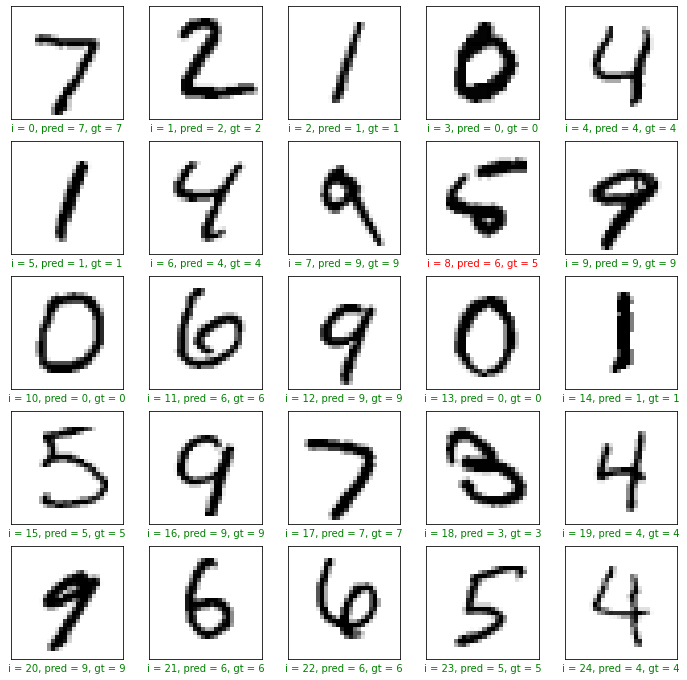

In [70]:
# Plotting some predictions and their labels

plt.figure(figsize = (12, 12))

start=0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(preds[start+i])
    gt = y_test[start+i]
    col = 'g'
    if pred != gt:
        col = 'r'

    plt.xlabel('i = {}, pred = {}, gt = {}'.format(start+i, pred, gt), color = col)
    plt.imshow(x_test[start+i], cmap = 'binary')

plt.show()

#### Looks like all our predictions expect for one are correct!

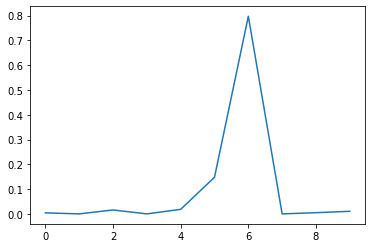

In [72]:
# Lets look at the prediction probability of the example our model got wrong (index 8)

plt.plot(preds[8])
plt.show()

#### As you can see the probability is the highest for 6 which is inaccurate! The probability shown is the softmax probability output!
#### Hope you enjoyed this basic image classification model creation using Tensorflow :)